# Loan Status Classification
#### Tridib Dalui

In [133]:
import numpy as np
import pandas as pd           

In [134]:
from warnings import filterwarnings
filterwarnings('ignore')

Reading the data

In [135]:
df=pd.read_csv('train_ctrUa4K.csv')
df_test=pd.read_csv('test_lAUu6dG.csv')

In [136]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
134,LP001487,Male,No,0,Graduate,No,4895,0.0,102.0,360.0,1.0,Semiurban,Y
71,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
437,LP002401,Male,Yes,0,Graduate,No,2213,1125.0,NaN,360.0,1.0,Urban,Y
204,LP001691,Male,Yes,2,Not Graduate,No,3917,0.0,124.0,360.0,1.0,Semiurban,Y
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
286,LP001925,Female,No,0,Graduate,Yes,2600,1717.0,99.0,300.0,1.0,Semiurban,N
410,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
172,LP001586,Male,Yes,3+,Not Graduate,No,3522,0.0,81.0,180.0,1.0,Rural,N
505,LP002622,Male,Yes,2,Graduate,No,3510,4416.0,243.0,360.0,1.0,Rural,Y


In [137]:
df_test.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
252,LP002389,Female,No,1,Graduate,No,4028,0,131.0,360.0,1.0,Semiurban
294,LP002610,Male,Yes,1,Not Graduate,NaN,1792,2565,128.0,360.0,1.0,Urban
57,LP001321,Male,Yes,2,Graduate,No,3613,3539,134.0,180.0,1.0,Semiurban
273,LP002495,Male,Yes,2,Graduate,No,5667,440,130.0,360.0,0.0,Semiurban
329,LP002816,Male,Yes,1,Graduate,No,3500,1658,104.0,360.0,NaN,Semiurban
325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.0,Semiurban
355,LP002932,Male,Yes,3+,Graduate,No,7603,1213,197.0,360.0,1.0,Urban
110,LP001584,Female,No,0,Graduate,Yes,4742,0,108.0,360.0,1.0,Semiurban
26,LP001163,Male,Yes,2,Graduate,No,4363,1250,140.0,360.0,NaN,Urban
297,LP002630,Male,No,0,Not Graduate,NaN,3808,0,83.0,360.0,1.0,Rural


### Data Preprocessing

In [138]:
print(df.shape)
print(df_test.shape)

(614, 13)
(367, 12)


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [140]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [141]:
#checking for Null values

df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [142]:
# filling Null values with mode

df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna(df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().median() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode().values[0] )

In [143]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [144]:
#check in the test data

df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [145]:
df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].dropna().mode().values[0] )
df_test['Married'] = df_test['Married'].fillna(df_test['Married'].dropna().mode().values[0] )
df_test['Dependents'] = df_test['Dependents'].fillna(df_test['Dependents'].dropna().mode().values[0] )
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(df_test['Self_Employed'].dropna().mode().values[0] )
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].dropna().median() )
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].dropna().mode().values[0] )
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].dropna().mode().values[0] )

In [146]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [147]:
# statistical data

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [148]:
# there is a clear outlier in LoanAmmount

df=df[df['LoanAmount']<=600]

In [149]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### Data Visulaization

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

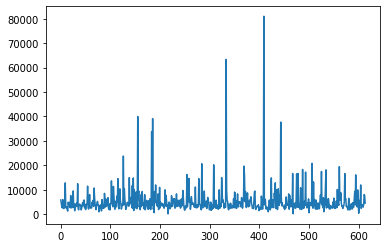

In [151]:
plt.plot(df['ApplicantIncome'])

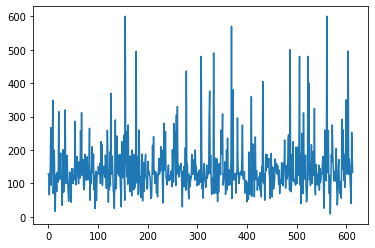

In [152]:
plt.plot(df['LoanAmount'])

In [153]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.113642,0.520485,-0.049680,-0.026786
CoapplicantIncome,-0.113642,1.000000,0.215193,-0.058311,0.011889
LoanAmount,0.520485,0.215193,1.000000,0.024867,-0.009738
Loan_Amount_Term,-0.049680,-0.058311,0.024867,1.000000,-0.005725
Credit_History,-0.026786,0.011889,-0.009738,-0.005725,1.000000


### now we need to convert the categorical datas into neumeric data

In [154]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [155]:
df['Gender']=le.fit_transform(df['Gender'])

In [156]:
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Property_Area']=le.fit_transform(df['Property_Area'])

Lets do the same for test

In [157]:
df_test['Married']=le.fit_transform(df_test['Married'])
df_test['Dependents']=le.fit_transform(df_test['Dependents'])
df_test['Education']=le.fit_transform(df_test['Education'])
df_test['Self_Employed']=le.fit_transform(df_test['Self_Employed'])
df_test['Gender']=le.fit_transform(df_test['Gender'])
df_test['Property_Area']=le.fit_transform(df_test['Property_Area'])

In [158]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [159]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [160]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.365918,0.172602,0.046217,-0.002201,0.053976,0.083841,0.104223,-0.075506,0.008540,-0.027718,0.016964
Married,0.365918,1.000000,0.332069,0.011778,0.010730,0.050923,0.075551,0.163431,-0.095931,0.011396,0.005567,0.092437
Dependents,0.172602,0.332069,1.000000,0.057331,0.061895,0.099116,0.031948,0.157495,-0.099760,-0.041366,-0.003261,0.008512
Education,0.046217,0.011778,0.057331,1.000000,-0.008573,-0.139616,-0.063308,-0.169338,-0.072983,-0.073000,-0.063315,-0.084821
Self_Employed,-0.002201,0.010730,0.061895,-0.008573,1.000000,0.129513,-0.014232,0.101704,-0.043448,-0.003017,-0.035446,-0.006113
ApplicantIncome,0.053976,0.050923,0.099116,-0.139616,0.129513,1.000000,-0.113642,0.520485,-0.049680,-0.026786,-0.031253,-0.016644
CoapplicantIncome,0.083841,0.075551,0.031948,-0.063308,-0.014232,-0.113642,1.000000,0.215193,-0.058311,0.011889,0.012776,-0.058037
LoanAmount,0.104223,0.163431,0.157495,-0.169338,0.101704,0.520485,0.215193,1.000000,0.024867,-0.009738,-0.077171,-0.050527
Loan_Amount_Term,-0.075506,-0.095931,-0.099760,-0.072983,-0.043448,-0.049680,-0.058311,0.024867,1.000000,-0.005725,-0.079594,-0.024296
Credit_History,0.008540,0.011396,-0.041366,-0.073000,-0.003017,-0.026786,0.011889,-0.009738,-0.005725,1.000000,0.000318,0.540200


### making input & output data

In [161]:
df=df.drop('Loan_ID',axis=1)
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

### Traning & Testing data

In [162]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

### Building Model

In [163]:
from sklearn.metrics import accuracy_score

In [164]:
# 1) Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
LogisticRegression()
pred_lr=LR.predict(x_test)
LR.score(x_test, y_test)

0.7320261437908496

In [165]:
# 2) Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model4=dtc.fit(x_train,y_train)
prediction2=model4.predict(x_test)
accuracy_score(y_test,prediction2)

0.673202614379085

In [166]:
# 3) Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model8=rfc.fit(x_train,y_train)
prediction3=model8.predict(x_test)
accuracy_score(y_test,prediction3)

0.7124183006535948

In [167]:
# 4) Multinomial naive Bayes

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train , y_train)
model16=nb.fit(x_train,y_train)
prediction4=model16.predict(x_test)
accuracy_score(y_test,prediction4)

0.5490196078431373

### It is not Giving result as i expected so lets optimize the dataset & try again

In [168]:
df=df.drop('Dependents',axis=1)
df=df.drop('Self_Employed',axis=1)

In [169]:
df

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [170]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [171]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [172]:
# 1) Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
LogisticRegression()
pred_lr=LR.predict(x_test)
LR.score(x_test, y_test)

0.8562091503267973

In [173]:
# 2) Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model4=dtc.fit(x_train,y_train)
prediction2=model4.predict(x_test)
accuracy_score(y_test,prediction2)

0.6666666666666666

In [174]:
# 3) Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model8=rfc.fit(x_train,y_train)
prediction3=model8.predict(x_test)
accuracy_score(y_test,prediction3)

0.7973856209150327

### so our LR model is giving highest prediction value so

#### lets make a prediction using lr on test data there 

In [192]:
df_test.iloc[49].values

array([1.00e+00, 1.00e+00, 1.00e+00, 8.00e+03, 2.50e+02, 1.87e+02,
       3.60e+02, 1.00e+00, 1.00e+00])

In [191]:
LR.predict([[1.0e+00, 0.0e+00, 0.0e+00, 6.5e+03, 2.6e+03, 2.0e+02, 3.6e+02,
       1.0e+00, 1.0e+00]])

array([1])

In [193]:
import pickle
pickle.dump(LR,open('model.pkl','wb'))